**Clinical Trials is a database of privately and publicly funded clinical studies conducted around the world. It is maintained by the National Institute of Health. All data is publicly available and the site provides a direct download feature which makes it super easy to use relevant data for analysis.**

* In this Notebook we will analyse the studies undergoing for finding the COVID and pneaumonia related disease vaccines, their Progress and Timeline. 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd 
import numpy as np 
import datetime 

file_path = "/content/COVID clinical trials.csv.zip"
data = pd.read_csv(file_path)
data.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [ ]:
data.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [ ]:
cols_date = ['Start Date', 
             'Primary Completion Date', 
             'Completion Date', 
             'First Posted',
             'Results First Posted', 
             'Last Update Posted']
# data.info()

def convert_datetime(data, cols_date):
    for c in cols_date:
        data[c] = pd.to_datetime(data[c])
    return data

data = convert_datetime(data, cols_date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rank                     5783 non-null   int64         
 1   NCT Number               5783 non-null   object        
 2   Title                    5783 non-null   object        
 3   Acronym                  2480 non-null   object        
 4   Status                   5783 non-null   object        
 5   Study Results            5783 non-null   object        
 6   Conditions               5783 non-null   object        
 7   Interventions            4897 non-null   object        
 8   Outcome Measures         5748 non-null   object        
 9   Sponsor/Collaborators    5783 non-null   object        
 10  Gender                   5773 non-null   object        
 11  Age                      5783 non-null   object        
 12  Phases                   3322 non-

* 'Results First Posted' and 'Study Documents' have more that 95% of missing values.

* we can remove those columns data

In [ ]:
# percentatge of missing values per columns 

def missing_percentage(data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing}, index = data.columns )
    return missing_value_df.sort_values(by = 'percent_missing', ascending = False)
miss_per = missing_percentage(data)
miss_per

,percent_missing
Results First Posted,99.377486
Study Documents,96.852845
Acronym,57.115684
Phases,42.555767
Interventions,15.320768
Locations,10.115857
Completion Date,0.622514
Primary Completion Date,0.622514
Study Designs,0.605222
Outcome Measures,0.605222


**Observations:**

* Null Observations

    *  Results First Posted has 99.9% Null values (with only 1 non Null value)
    *  Study Documents has 98.15% Null Values
    * Acronyms has 53.1% Null Values
    * Phases has 43.43% Null Values
* Unique Observations
    * URL, Rank and NCT Number have Unique values for every data point
    * Some data points have same title and same 'Other Ids'






In [ ]:
# Drop the columns that have more that 95% missing values

lmiss = miss_per['percent_missing'].tolist()
df = data.copy()

todrop_columns = [miss_per.index[i] for i in  range(len(miss_per.index)) if lmiss[i] > 95]
df.drop(df[todrop_columns], axis = 1, inplace = True)
df.columns


Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [ ]:
df.shape

(5783, 25)

**EDA**

* To the text, do some small text cleaning.. exple.. some conditions are the same but writen with capital and nor capital letters.

In [ ]:
import matplotlib.pyplot  as plt 
%matplotlib inline 

import seaborn as sns
sns.set_style('white')


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

* Now you're ready to read in the data and use the plotting functions to visualize the data.

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# COVID clinical trials.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/COVID clinical trials.csv.zip', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'COVID clinical trials.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 27 columns


**Let's take a quick look at what the data looks like:**

In [ ]:
df1.head(5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


**Distribution graphs (histogram/bar graph) of sampled columns:**

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


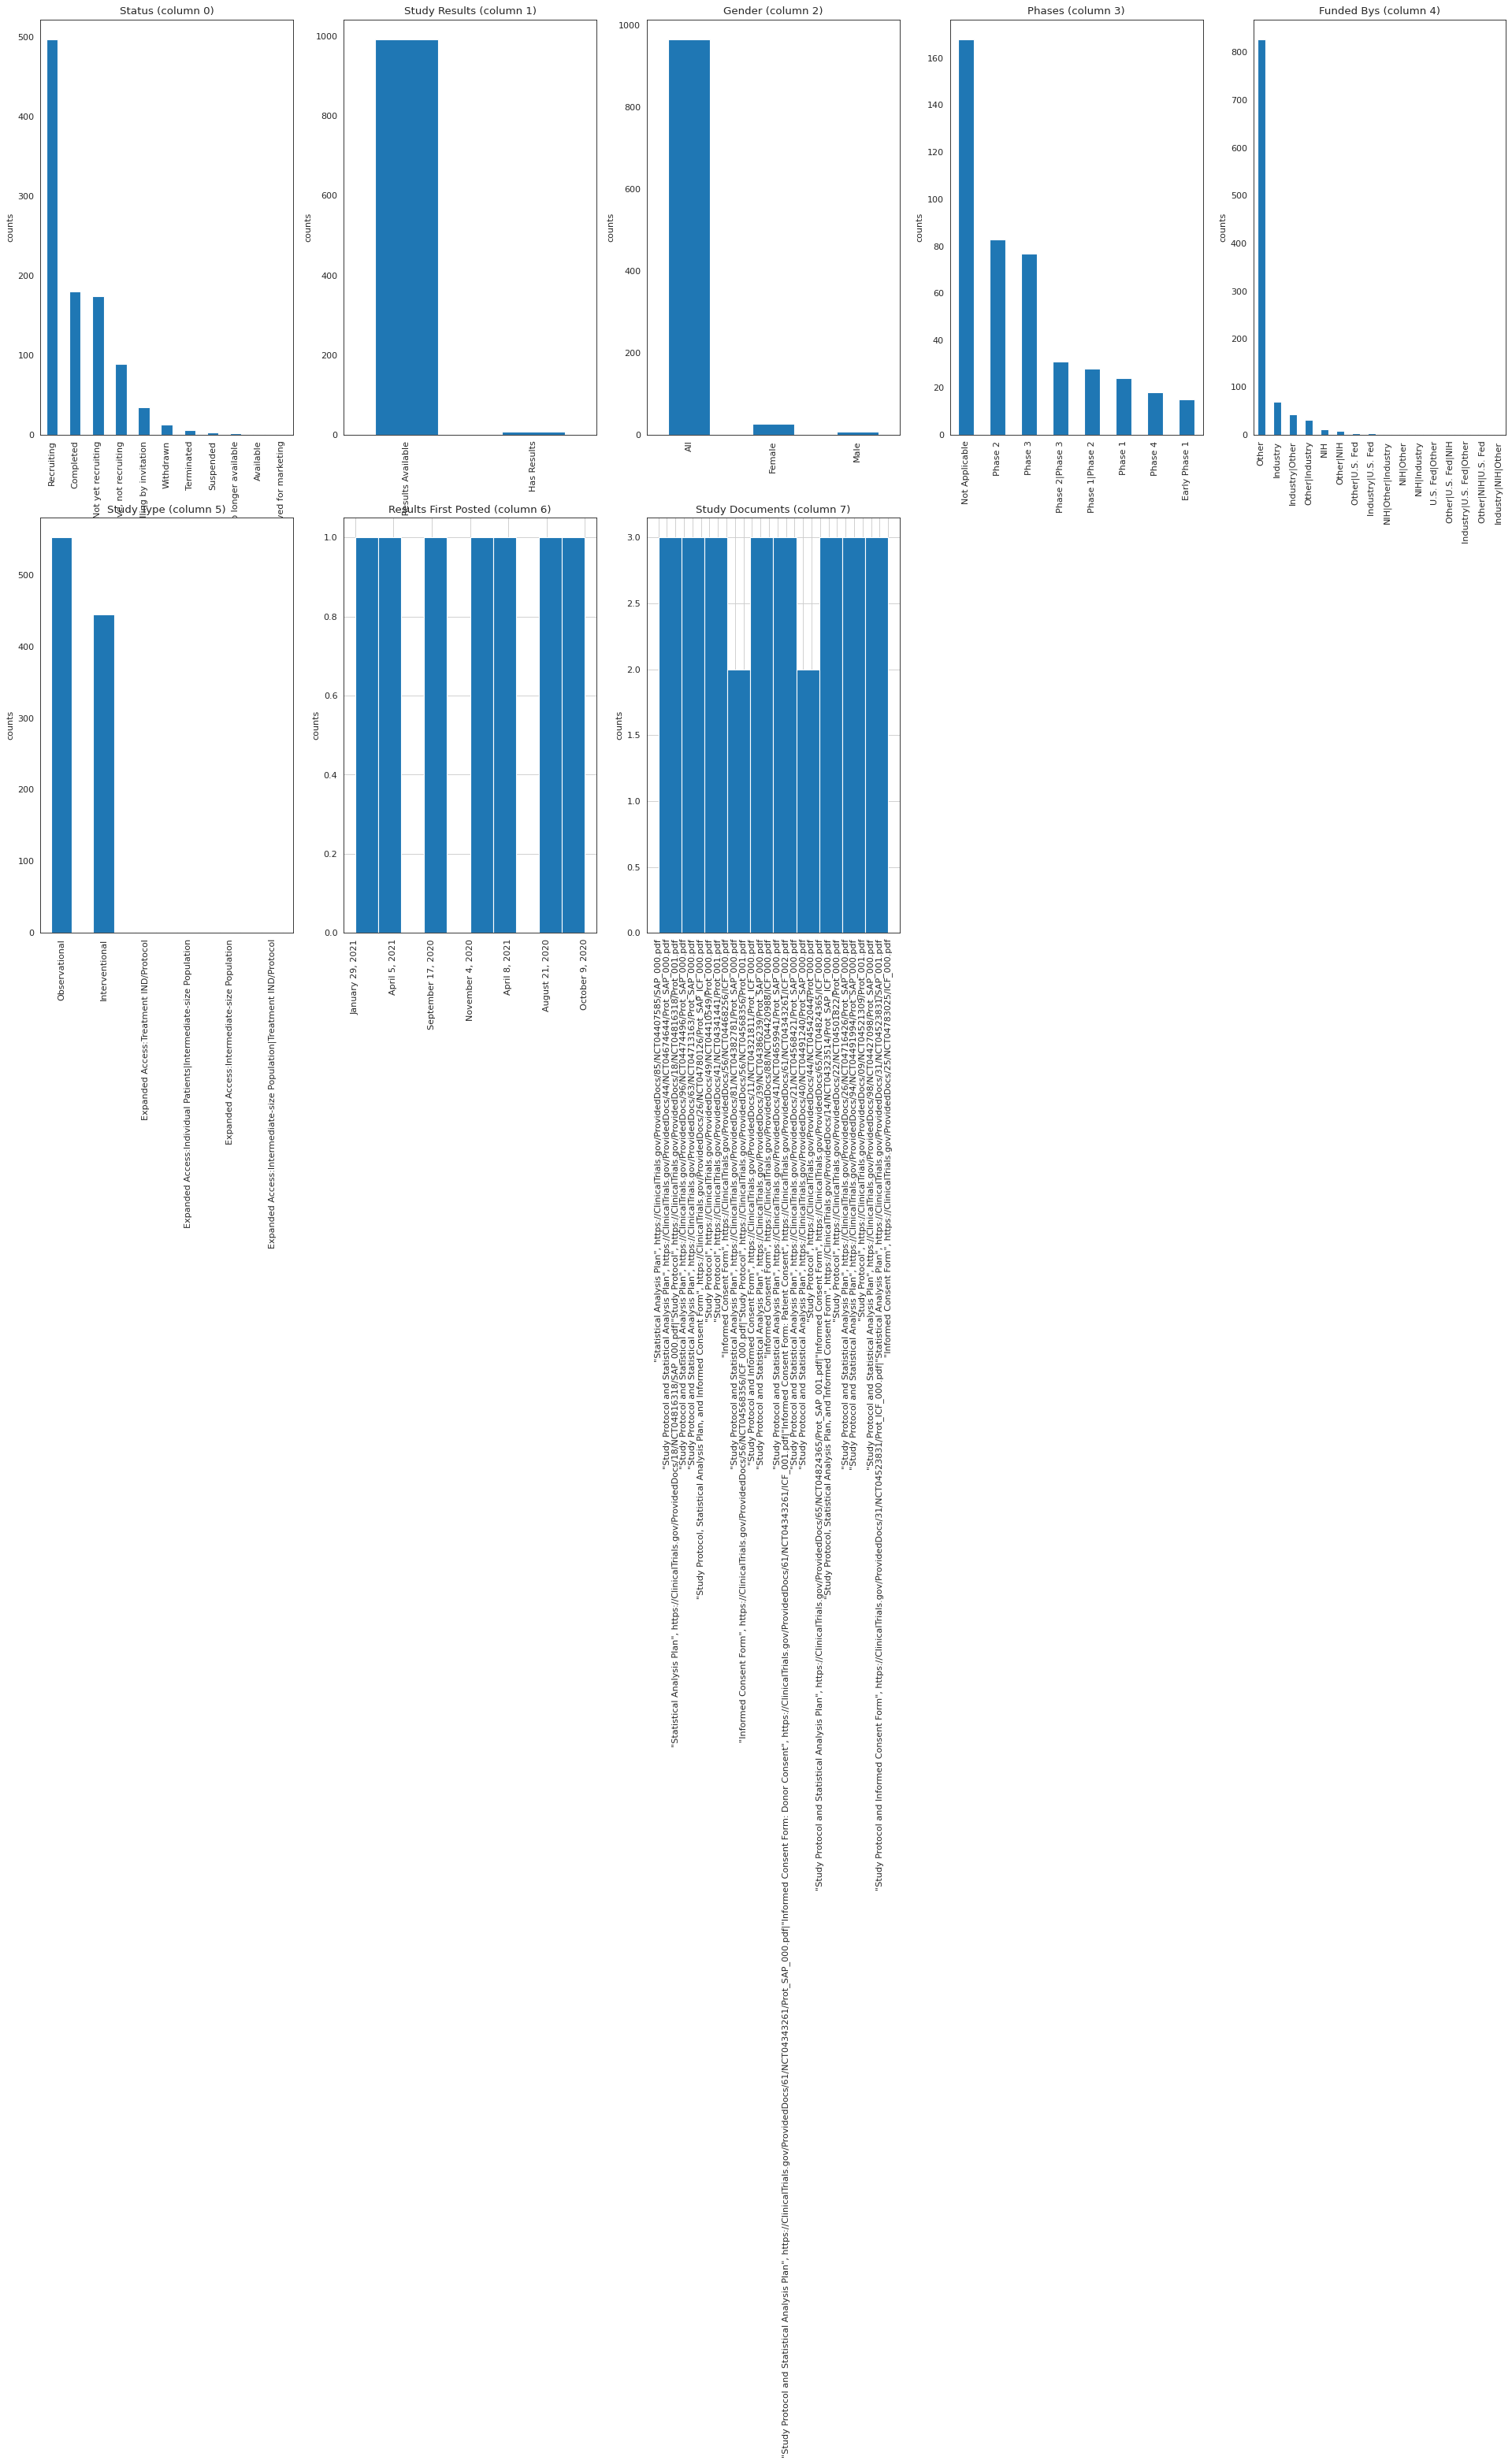

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


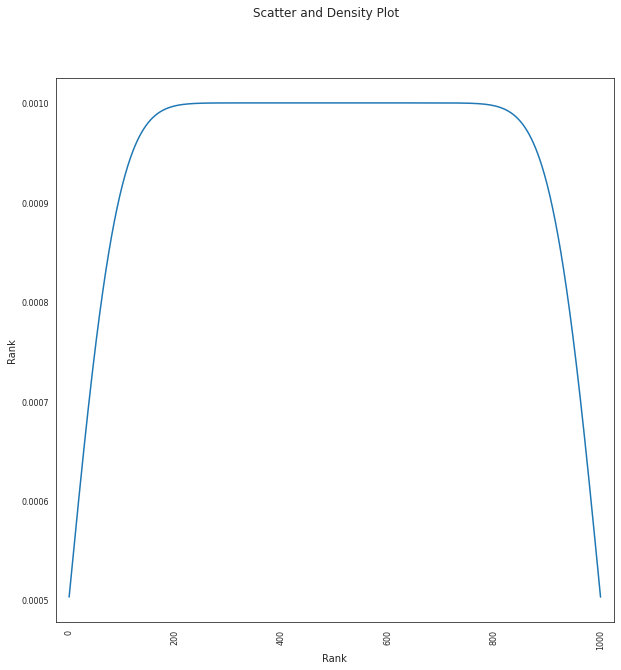

In [ ]:
plotScatterMatrix(df1, 10, 200)

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from collections import defaultdict 
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [ ]:
fig = px.pie(data,'Study Results')
fig.update_layout(title='Do we have any results to study?')
fig.show()

**Observations:**

*   0.038% studies have attained some results
*   Remaining 99.97% results have NO RESULTS






In [ ]:
fig = go.Figure(go.Bar(
    x= data.groupby('Phases').agg('count')['Rank'].sort_values(ascending=False).index, 
    y= data.groupby('Phases').agg('count')['Rank'].sort_values(ascending=False).values,  
    text=data.groupby('Phases').agg('count')['Rank'].sort_values(ascending=False).index,
    textposition='outside',
    marker_color=data.groupby('Phases').agg('count')['Rank'].sort_values(ascending=False).values
))
fig.update_layout(title='Phases across Studies')
fig.show()

Observations:

*   Most relevant takes are that a high number (378) of studies are in the 2nd Phase
*   77 Studies are in Phase 3
*   72 Studies are in Phase 4 (Very close to reaching a solution)
*   Majority Studies have Not Applicable Phase

**Exploring Status**

In [ ]:
data.Status.hist()

Status : Indicates the current recruitment status or the expanded access status


**Observations:**

*   Most studies are recruiting indicating a need of skilled individuals
* Next highest group is Not Yet Recruiting indicating studies havent attained a stage to begin getting professionals onboard

**Most Popular Interventions**

In [ ]:
# Returns list of Series index and its count where count > threshold
def popularity(col,threshold):
    idx = []
    counts = []
    other = 0
    for index,vcount in zip(data[col].value_counts().index,data[col].value_counts().values):
        if vcount < threshold:
            other+=1
            continue
        idx.append(index)
        counts.append(vcount)
    idx.append('Others')
    counts.append(other)
    return idx,counts

In [ ]:
idx , counts = popularity('Interventions',8)
fig = go.Figure([go.Pie(labels=idx,values=counts,textinfo='label+percent')])
fig.update_layout(title='What are the top Interventions?')
fig.show()

Intervention refers to the medicinal product (e.g drug, device, vaccine, placebo etc) given to the patients in a study

**Observations:**

* Hydroxychloroquine is most used Intervention
* Next common occurence is No Intervention
* NOTE : Others include all interventions with less than 8 occurences

**What are the target Completion Dates for studies?**

In [ ]:
data['Completion Date'].dt.year.hist()

**Observations:**

* Some studies mark their completion date in 2099, which seems to be an outlier
* Most studies aim to complete between 2020-2025

**What Conditions are these Studies treating?**

* The disease, disorder, syndrome, illness, or injury that is being studied

Text(0.5, 1.0, 'What Conditions are we trying to treat')

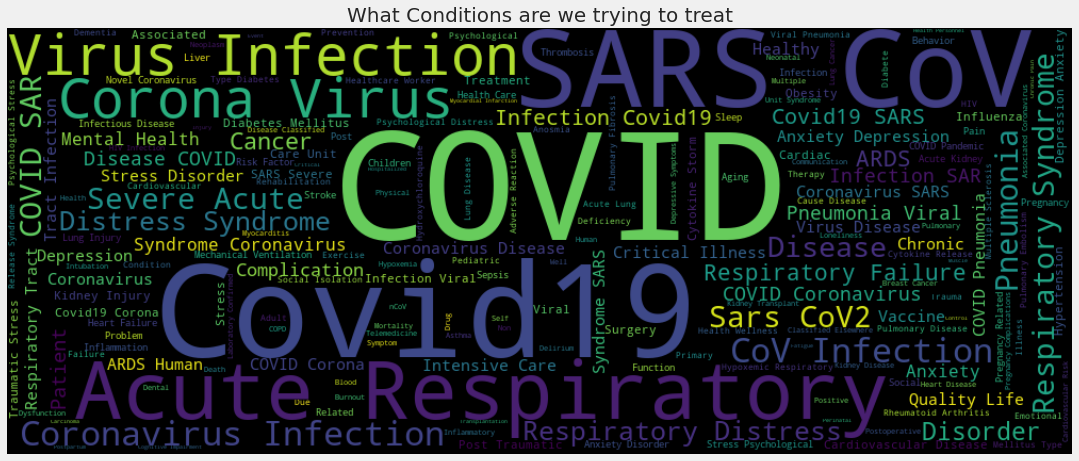

In [ ]:
conditions=list(data['Conditions'].dropna().unique())
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(width=1000,height=400).generate(" ".join(conditions))
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('What Conditions are we trying to treat',fontsize=20)

**Observations:**

* The keywords are : COVID, Coronavirus, SARS, CoV indicating major research being done to find a cure for these diseases
* Less Common conditions are Hypoxemia, Viral Pneumonia, Pregnancy

**Where are these studies taking place?**

In [ ]:
def splitLoc(loc):
    return loc.split(',')[-1].strip()

In [ ]:
data['Loc'] = data.Locations.apply(lambda x:splitLoc(str(x)))

In [ ]:
fig = go.Figure([go.Choropleth(
    locations=data.groupby(['Loc']).agg('count')['Rank'].index,
    z=data.groupby(['Loc']).agg('count')['Rank'].values.astype(float),
    locationmode='country names',
    colorscale='Blues',
    autocolorscale=False,
    marker_line_color='white',
    showscale = True,
)])
fig.update_layout(title='Study Locations')
fig.show()

**Observations:**

* Most Studies take place in USA (517)
* Next highest count is in France (349)

In [ ]:
idx , counts = popularity('Funded Bys',0)
fig = go.Figure([go.Pie(labels=idx,values=counts,textinfo='label+percent')])
fig.update_layout(title='Who are the top Funders?')
fig.show()

**Observations:**

* Max Funding is by Industry
* NIH - National Institute of Health and US FED has also funded many studies

**What Age Bracket and Gender are these Studies considering?**

In [ ]:
def cleanAge(age):
    if len(re.findall(r'\(.*\)',age)):
        return re.findall(r'\(.*\)',age)[0]
    return '('+age+')'

In [ ]:
ageData = data.Age.apply(lambda x : cleanAge(x))
ageData.hist()

**Observations:**

* Most Studies involve (Adult, Older Adult) Population
* Only Child studies are very few

In [ ]:
data['AgeBrackets'] = ageData

In [ ]:
i = 0
fig = make_subplots(rows=3, cols=2, subplot_titles=list(pd.DataFrame(data.groupby(['AgeBrackets'])['Gender'].value_counts()).unstack().index))
for row in range(1,4):
    for col in range(1,3):
        dt = pd.DataFrame(data.groupby(['AgeBrackets'])['Gender'].value_counts()).unstack().iloc[i]
        fig.add_trace(go.Bar(x=dt.Gender.index,y=dt.Gender.values),row = row, col = col)        
        i+=1
fig.show()

**Observations:**

* Most studies have taken data from All Genders
* In (Adult) and (Child,Adult) Category there is significant number of Female patients considered for the studies

**Final Summary:**

* Most Undergoing Studies are in Phase 2 with only 2.77% studies in Phase 4
* Most studies are recruiting indicating a need of skilled individuals
* Hydroxychloroquine is most used Intervention
* Most Studies involve (Adult, Older Adult) Population with very few studies focussed on Children
* Most studies have 0-40k participants in the clinical trials
* Most Studies follow observational and interventional methodology
* Most Studies take place in USA (517) and France (349)
* Max Funding for these Clinical trials are done by 'Industries'. Some studies are funded by NIH and US-FEDs
* Most Studies aim to be completed by 2020-2025